# Analysis and visualization of hit-graph datasets

The purpose of this notebook is to analyze the preprocessed hit-graph datasets.

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [51]:
def process_file(filename):
    with np.load(filename) as f:
        n_nodes = f['X'].shape[0]
        n_edges = f['y'].shape[0]
        purity = f['y'].mean()
    return dict(n_nodes=n_nodes, n_edges=n_edges, purity=purity)

def process_dataset(data_dir, n_files=None):
    files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)
             if not f.endswith('_ID.npz')]
    print('%i total files' % len(files))
    if n_files is not None:
        files = files[:n_files]
    return (pd.DataFrame.from_records([process_file(f) for f in files])
            .assign(file=files))

def summarize_dataset(data):
    print('Samples:', data.shape[0])
    print('Min nodes:', data.n_nodes.min())
    print('Max nodes:', data.n_nodes.max())
    print('Min edges:', data.n_edges.min())
    print('Max edges:', data.n_edges.max())
    print('Mean purity: %.4f' % data.purity.mean())

## Available datasets 

In [61]:
ls /global/cscratch1/sd/sfarrell/heptrkx/data/

hitgraphs_000/  hitgraphs_big_000/   hitgraphs_med_000/  hitgraphs_med_003/
hitgraphs_001/  hitgraphs_high_000/  hitgraphs_med_001/  hitgraphs_small_000/
hitgraphs_002/  hitgraphs_high_001/  hitgraphs_med_002/


## Small dataset

In [4]:
data_dir = '/global/cscratch1/sd/sfarrell/heptrkx/data/hitgraphs_small_000'
n_files = 1000

In [5]:
%%time

data = process_dataset(data_dir, n_files)

32768 total files
CPU times: user 2.5 s, sys: 2.89 s, total: 5.39 s
Wall time: 26.6 s


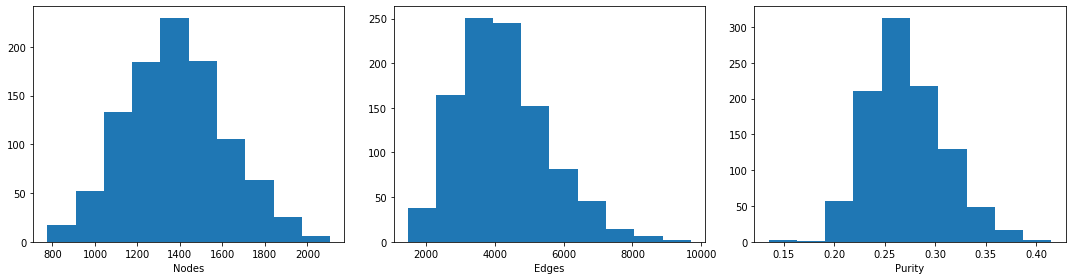

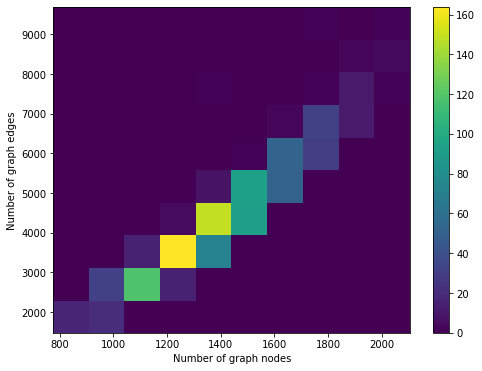

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 4))

ax0.hist(data.n_nodes)
ax0.set_xlabel('Nodes')
ax1.hist(data.n_edges)
ax1.set_xlabel('Edges')
ax2.hist(data.purity)
ax2.set_xlabel('Purity')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.hist2d(data.n_nodes, data.n_edges, cmin=1)
plt.xlabel('Number of graph nodes')
plt.ylabel('Number of graph edges')
plt.colorbar()

summarize_dataset(data)

## Medium dataset

In [7]:
data_dir = '/global/cscratch1/sd/sfarrell/heptrkx/data/hitgraphs_med_002'
n_files = 1000

In [8]:
%%time

data = process_dataset(data_dir, n_files)

65536 total files
CPU times: user 2.27 s, sys: 2.88 s, total: 5.15 s
Wall time: 30.1 s


In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 4))

ax0.hist(data.n_nodes)
ax0.set_xlabel('Nodes')
ax1.hist(data.n_edges)
ax1.set_xlabel('Edges')
ax2.hist(data.purity)
ax2.set_xlabel('Purity')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.hist2d(data.n_nodes, data.n_edges, cmin=1)
plt.xlabel('Number of graph nodes')
plt.ylabel('Number of graph edges')
plt.colorbar()

summarize_dataset(data)

## Big dataset

In [10]:
data_dir = '/global/cscratch1/sd/sfarrell/heptrkx/data/hitgraphs_big_000'
n_files = 1000

In [11]:
%%time

data = process_dataset(data_dir, n_files)

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 4))

ax0.hist(data.n_nodes)
ax0.set_xlabel('Nodes')
ax1.hist(data.n_edges)
ax1.set_xlabel('Edges')
ax2.hist(data.purity)
ax2.set_xlabel('Purity')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.hist2d(data.n_nodes, data.n_edges, cmin=1)
plt.xlabel('Number of graph nodes')
plt.ylabel('Number of graph edges')
plt.colorbar()

summarize_dataset(data)

## High-density dataset 000

In [65]:
data_dir = '/global/cscratch1/sd/sfarrell/heptrkx/data/hitgraphs_high_000'
n_files = None

In [66]:
%%time

data = process_dataset(data_dir, n_files)

65536 total files
CPU times: user 3min 23s, sys: 4min 57s, total: 8min 20s
Wall time: 46min 58s


Samples: 65536
Min nodes: 2455
Max nodes: 6891
Min edges: 6803
Max edges: 52793
Mean purity: 0.0721


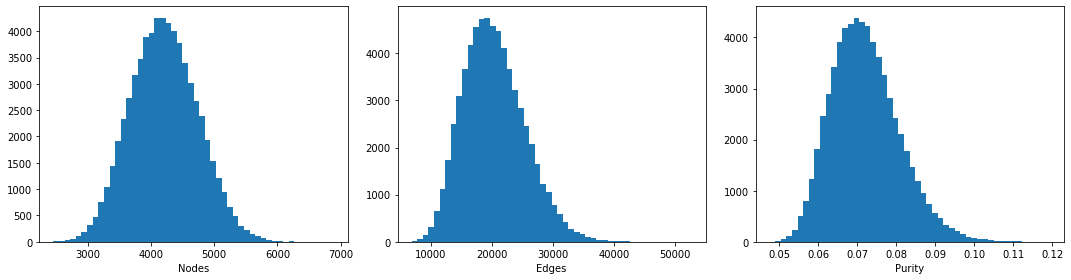

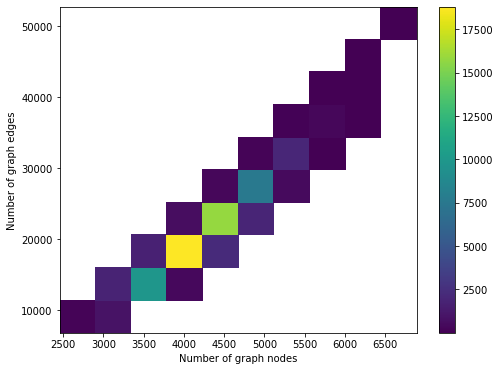

In [67]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 4))

log=False
ax0.hist(data.n_nodes, bins=50, log=log)
ax0.set_xlabel('Nodes')
ax1.hist(data.n_edges, bins=50, log=log)
ax1.set_xlabel('Edges')
ax2.hist(data.purity, bins=50)
ax2.set_xlabel('Purity')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.hist2d(data.n_nodes, data.n_edges, cmin=1)
plt.xlabel('Number of graph nodes')
plt.ylabel('Number of graph edges')
plt.colorbar()

summarize_dataset(data)

### Remove the tails

In [68]:
min_edges, max_edges = 12000, 30000

sel_data = data[(data.n_edges > min_edges) & (data.n_edges < max_edges)]

print('Out of %i samples,' % data.shape[0])
print('  %i have fewer than %i edges,' % ((data.n_edges < min_edges).sum(), min_edges))
print('  %i have more than %i edges,' % ((data.n_edges > max_edges).sum(), max_edges))
print('  we keep %.3f of data' % (sel_data.shape[0] / data.shape[0]))

Out of 65536 samples,
  1834 have fewer than 12000 edges,
  2523 have more than 30000 edges,
  we keep 0.934 of data


In [69]:
# Write out a dataset file
dataset_file = 'dataset_high_000.csv'
sel_data.to_csv(dataset_file)

## High-density dataset 001

In [62]:
data_dir = '/global/cscratch1/sd/sfarrell/heptrkx/data/hitgraphs_high_001'
n_files = 1000

In [63]:
%%time

data = process_dataset(data_dir, n_files)

35400 total files
CPU times: user 4.28 s, sys: 5.07 s, total: 9.35 s
Wall time: 51 s


Samples: 1000
Min nodes: 5543
Max nodes: 11421
Min edges: 18272
Max edges: 73531
Mean purity: 0.0725


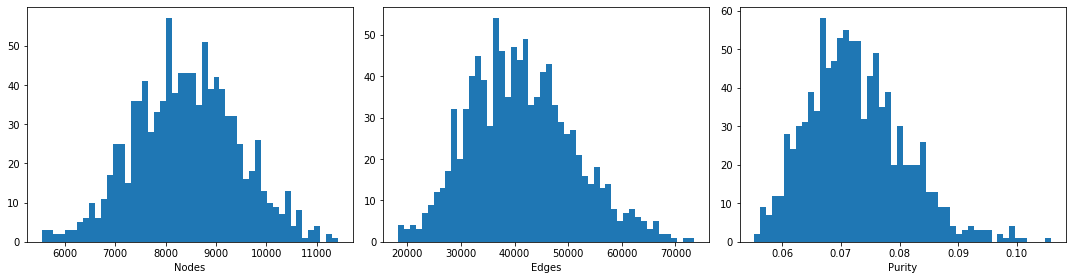

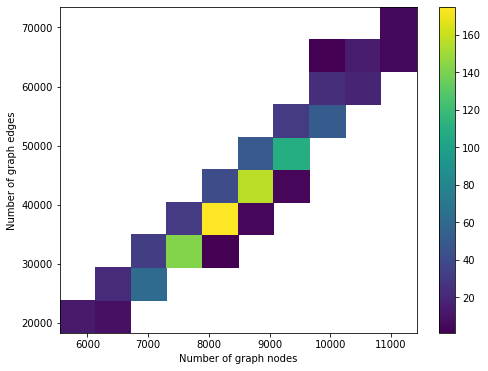

In [64]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 4))

ax0.hist(data.n_nodes, bins=50)
ax0.set_xlabel('Nodes')
ax1.hist(data.n_edges, bins=50)
ax1.set_xlabel('Edges')
ax2.hist(data.purity, bins=50)
ax2.set_xlabel('Purity')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.hist2d(data.n_nodes, data.n_edges, cmin=1)
plt.xlabel('Number of graph nodes')
plt.ylabel('Number of graph edges')
plt.colorbar()

summarize_dataset(data)